In [ ]:
#using used cars dataset from cardekho.com

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics #to calculate errors
import seaborn as sns

In [2]:
car = pd.read_csv("car data.csv")
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
print(car["Fuel_Type"].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [8]:
fuel_type = car['Fuel_Type']
seller_type = car['Seller_Type']
transmission_type = car['Transmission']
selling_price = car['Selling_Price']

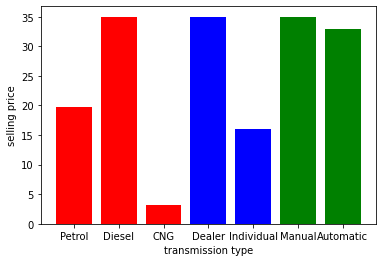

In [9]:
#visualizing data columns 
plt.bar(fuel_type,selling_price,color = "red")
plt.xlabel("fuel type")
plt.ylabel("selling price")
plt.bar(seller_type,selling_price,color = "blue")
plt.xlabel("seller type")
plt.ylabel("selling price")
plt.bar(transmission_type,selling_price, color = "green")
plt.xlabel("transmission type")
plt.ylabel("selling price")
plt.show() #showing all 3 graphs in one graph 

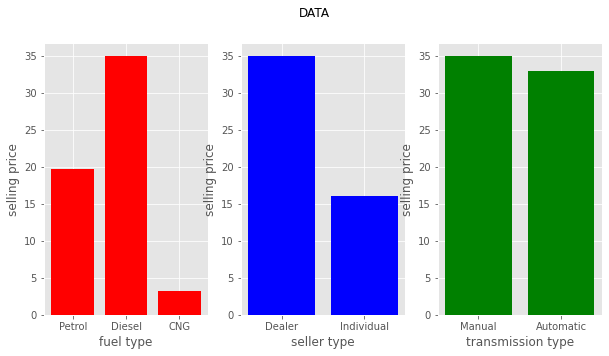

In [10]:
#same plot but using subplots and style, style is like css for graphs 
from matplotlib import style 

style.use("ggplot")
fig = plt.figure(figsize = (10,5))
fig.suptitle("DATA")
plt.subplot(1,3,1) #one row with 3 columns 
plt.bar(fuel_type,selling_price,color = "red")
plt.xlabel("fuel type")
plt.ylabel("selling price")

plt.subplot(1,3,2)
plt.bar(seller_type,selling_price,color = "blue")
plt.xlabel("seller type")
plt.ylabel("selling price")

plt.subplot(1,3,3)
plt.bar(transmission_type,selling_price, color = "green")
plt.xlabel("transmission type")
plt.ylabel("selling price")
plt.show()

In [ ]:
#converting to numerical type 

In [11]:
#method 1
car.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [12]:
#method 2
car = pd.get_dummies(car,columns=['Seller_Type', 'Transmission'], drop_first=True)
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


In [ ]:
#splitting the data 

In [14]:
x = car.drop(['Car_Name','Selling_Price'],axis = 1)

In [17]:
y = car['Selling_Price']

In [18]:
print(x.shape)
print(y.shape)

(301, 7)
(301,)


In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(210, 7)
(91, 7)
(210,)
(91,)


In [ ]:
#applying normalization on the data in different columns using standard scalar

In [25]:
scaler = StandardScaler()

In [26]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [29]:
model = LinearRegression()

In [31]:
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [32]:
#calculations 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
print("MAE:",metrics.mean_absolute_error(ypred,ytest))
print("MSE:",metrics.mean_squared_error(ypred,ytest))
print("R2:",metrics.r2_score(ypred,ytest)) 

MAE: 1.3104418459879668
MSE: 3.9085080406707107
R2: 0.8030932387619382


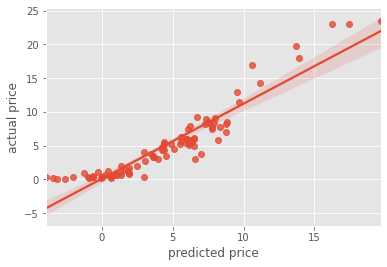

0.8593650025378061

In [42]:
sns.regplot(x=ypred,y=ytest)
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.show()
model.score(xtest,ytest)